In [1]:
import numpy as np
import pandas as pd
import tenseal as ts
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import tenseal as ts
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
import time
import psutil
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
from memory_profiler import memory_usage


In [2]:
df=pd.read_csv(r"C:\ML project\heart_disease_uci.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df = df.drop('id', axis=1)
df

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


check for missing values and duplicates

In [4]:

print(df.isnull().sum())

print("\n\nNumber of duplicates:", df.duplicated().sum())

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


Number of duplicates: 2


In [5]:
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df

for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0]).astype('category')

df

df = df.infer_objects()
df

C:\Users\valin\AppData\Local\Temp\ipykernel_29008\2407020272.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mode()[0]).astype('category')
C:\Users\valin\AppData\Local\Temp\ipykernel_29008\2407020272.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].fillna(df[column].mode()[0]).astype('category')


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,flat,0.0,normal,1
916,62,Male,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.5,flat,0.0,normal,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,flat,0.0,fixed defect,2
918,58,Male,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.5,flat,0.0,normal,0


In [6]:
print(df.isnull().sum())

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


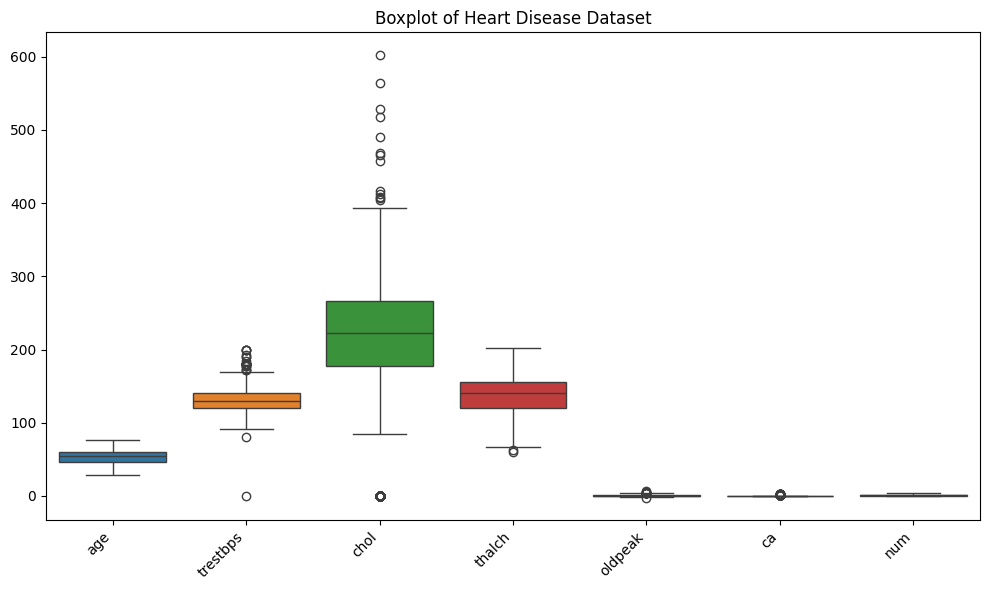

In [7]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Heart Disease Dataset')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Outliers in 'age':
 []
Outliers in 'trestbps':
 [172. 180. 200. 174. 178. 192. 180. 178. 180. 190. 180. 180. 180. 180.
 200. 180. 180.  80. 180. 200. 185. 200. 180.   0. 178. 172. 180. 190.]
Outliers in 'chol':
 [417. 407. 564. 409. 412. 468. 466. 529. 603. 404. 518. 491.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  

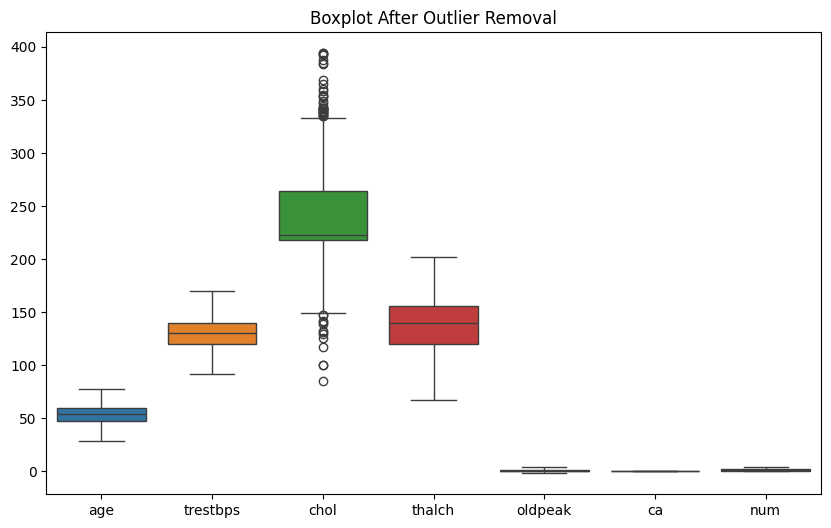

In [8]:
def detect_and_replace_outliers(df, column_name):
    
    if not pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"Skipping non-numeric column: {column_name}")
        return df  

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Outliers in '{column_name}':\n", outliers[column_name].values)

    median = df[column_name].median()
    df.loc[df[column_name] < lower_bound, column_name] = median
    df.loc[df[column_name] > upper_bound, column_name] = median

    return df

for col in ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'exang', 'ca', 'num', 'fbs']:
    df = detect_and_replace_outliers(df, col)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'exang', 'ca', 'num', 'fbs']])
plt.title("Boxplot After Outlier Removal")
plt.show()


In [9]:

data_encoded = df.copy()
data_encoded['sex'] = data_encoded['sex'].map({'Male': 1, 'Female': 0})

data_encoded = pd.get_dummies(data_encoded, columns=['fbs','exang','cp', 'restecg', 'slope', 'thal'], drop_first=True)
data_encoded.head()

,age,sex,dataset,trestbps,chol,thalch,oldpeak,ca,num,fbs_True,exang_True,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,Cleveland,145.0,233.0,150.0,2.3,0.0,0,True,False,False,False,True,False,False,False,False,False,False
1,67,1,Cleveland,160.0,286.0,108.0,1.5,0.0,2,False,True,False,False,False,False,False,True,False,True,False
2,67,1,Cleveland,120.0,229.0,129.0,2.6,0.0,1,False,True,False,False,False,False,False,True,False,False,True
3,37,1,Cleveland,130.0,250.0,187.0,3.5,0.0,0,False,False,False,True,False,True,False,False,False,True,False
4,41,0,Cleveland,130.0,204.0,172.0,1.4,0.0,0,False,False,True,False,False,False,False,False,True,True,False


In [10]:
from sklearn.preprocessing import StandardScaler

bool_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)
data_encoded.head()

,age,sex,dataset,trestbps,chol,thalch,oldpeak,ca,num,fbs_True,exang_True,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,Cleveland,145.0,233.0,150.0,2.3,0.0,0,1,0,0,0,1,0,0,0,0,0,0
1,67,1,Cleveland,160.0,286.0,108.0,1.5,0.0,2,0,1,0,0,0,0,0,1,0,1,0
2,67,1,Cleveland,120.0,229.0,129.0,2.6,0.0,1,0,1,0,0,0,0,0,1,0,0,1
3,37,1,Cleveland,130.0,250.0,187.0,3.5,0.0,0,0,0,0,1,0,1,0,0,0,1,0
4,41,0,Cleveland,130.0,204.0,172.0,1.4,0.0,0,0,0,1,0,0,0,0,0,1,1,0


In [11]:

data_encoded = pd.get_dummies(data_encoded, columns=['dataset'], prefix=['dataset'])

data_encoded.head()

,age,sex,trestbps,chol,thalch,oldpeak,ca,num,fbs_True,exang_True,...,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,63,1,145.0,233.0,150.0,2.3,0.0,0,1,0,...,0,0,0,0,0,0,True,False,False,False
1,67,1,160.0,286.0,108.0,1.5,0.0,2,0,1,...,0,0,1,0,1,0,True,False,False,False
2,67,1,120.0,229.0,129.0,2.6,0.0,1,0,1,...,0,0,1,0,0,1,True,False,False,False
3,37,1,130.0,250.0,187.0,3.5,0.0,0,0,0,...,1,0,0,0,1,0,True,False,False,False
4,41,0,130.0,204.0,172.0,1.4,0.0,0,0,0,...,0,0,0,1,1,0,True,False,False,False


In [12]:

scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

data_encoded.head()

,age,sex,trestbps,chol,thalch,oldpeak,ca,num,fbs_True,exang_True,...,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,dataset_VA Long Beach
0,1.007386,1,0.924535,-0.114864,0.487844,1.591244,0.0,0,1,0,...,0,0,0,0,0,0,True,False,False,False
1,1.432034,1,1.893076,1.085730,-1.200343,0.746132,0.0,2,0,1,...,0,0,1,0,1,0,True,False,False,False
2,1.432034,1,-0.689699,-0.205475,-0.356249,1.908161,0.0,1,0,1,...,0,0,1,0,0,1,True,False,False,False
3,-1.752828,1,-0.044005,0.270232,1.975056,2.858911,0.0,0,0,0,...,1,0,0,0,1,0,True,False,False,False
4,-1.328180,0,-0.044005,-0.771793,1.372132,0.640493,0.0,0,0,0,...,0,0,0,1,1,0,True,False,False,False


In [14]:
from sklearn.preprocessing import StandardScaler
bool_columns = data_encoded.select_dtypes(include=['bool']).columns

data_encoded[bool_columns] = data_encoded[bool_columns].astype(int)
data_encoded.head()

scaler = StandardScaler()
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

data_encoded.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,1.007386,0.675287,0.305908,0.480653,1.303159,0.0,0,1,0,...,0,1,1,0,0,0,0,0,0,0
1,2,1.432034,1.462483,0.784599,-1.140262,0.569611,3.0,2,1,0,...,0,0,0,0,0,1,1,0,1,0
2,3,1.432034,-0.636705,0.269780,-0.329805,1.578239,2.0,1,1,0,...,0,0,0,0,0,1,1,0,0,1
3,4,-1.752828,-0.111908,0.459450,1.908602,2.403480,0.0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
4,5,-1.328180,-0.111908,0.043982,1.329704,0.477918,0.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [15]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(columns=['num']) 
y = data_encoded['num'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:

df['num_binary'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

print(df['num_binary'].unique())  


[0 1]


In [17]:

df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.head())


   age  trestbps   chol  thalch  oldpeak   ca  num  num_binary  sex_Male  \
0   63     145.0  233.0   150.0      2.3  0.0    0           0      True   
1   67     160.0  286.0   108.0      1.5  0.0    2           1      True   
2   67     120.0  229.0   129.0      2.6  0.0    1           1      True   
3   37     130.0  250.0   187.0      3.5  0.0    0           0      True   
4   41     130.0  204.0   172.0      1.4  0.0    0           0     False   

   dataset_Hungary  ...  cp_non-anginal  cp_typical angina  fbs_True  \
0            False  ...           False               True      True   
1            False  ...           False              False     False   
2            False  ...           False              False     False   
3            False  ...            True              False     False   
4            False  ...           False              False     False   

   restecg_normal  restecg_st-t abnormality  exang_True  slope_flat  \
0           False                     F

Naive Bayes

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd

X = df_encoded.drop(['num', 'num_binary'], axis=1)  
y = df_encoded['num_binary'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.4f}")

Accuracy: 82.6087


In [19]:

context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[60, 40, 40, 60]
)
context.global_scale = 2**40
context.generate_galois_keys()

encrypted_X_test = [ts.ckks_vector(context, row) for row in X_test.to_numpy()]
encrypted_X_test

In [20]:

means = nb_model.theta_  
variances = nb_model.var_ 


encrypted_means = [ts.ckks_vector(context, mean) for mean in means.tolist()]
encrypted_variances = [ts.ckks_vector(context, variance) for variance in variances.tolist()]

print('Encrypted Means:')
for idx, mean in enumerate(encrypted_means):
    print(f'Mean for class {idx}: {mean}')

print('\n\nEncrypted Variances:')
for idx, variance in enumerate(encrypted_variances):
    print(f'Variance for class {idx}: {variance}')

Encrypted Means:
Mean for class 0: <tenseal.tensors.ckksvector.CKKSVector object at 0x0000029013B367E0>
Mean for class 1: <tenseal.tensors.ckksvector.CKKSVector object at 0x0000029013BB5910>


Encrypted Variances:
Variance for class 0: <tenseal.tensors.ckksvector.CKKSVector object at 0x0000029013AABF50>
Variance for class 1: <tenseal.tensors.ckksvector.CKKSVector object at 0x0000029013A7CAA0>


In [21]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[60, 40, 40, 60]
)
context.global_scale = 2 ** 40
context.generate_galois_keys()

encrypted_X_test = [ts.ckks_vector(context, sample.tolist()) for sample in X_test.to_numpy()]

means = nb_model.theta_ 
variances = nb_model.var_ 

encrypted_means = [ts.ckks_vector(context, mean) for mean in means.tolist()]
encrypted_variances = [ts.ckks_vector(context, variance) for variance in variances.tolist()]

def encrypted_nb_predict(encrypted_sample, encrypted_means, encrypted_variances):
    decrypted_sample = encrypted_sample.decrypt()

    log_probs = []
    for mean, variance in zip(encrypted_means, encrypted_variances):
       
        decrypted_mean = np.array(mean.decrypt())
        decrypted_variance = np.array(variance.decrypt())

        log_prob = -0.5 * np.sum((decrypted_sample - decrypted_mean) ** 2 / decrypted_variance)
        log_probs.append(log_prob)

    return np.argmax(log_probs)

encrypted_predictions = [encrypted_nb_predict(sample, encrypted_means, encrypted_variances) for sample in encrypted_X_test]

for i, pred in enumerate(encrypted_predictions):
    print(f"Decrypted Prediction for sample {i + 1}: {pred}")
    print(f"Sample {i + 1}: Score = {pred:.4f} -> Classification = {'Heart Disease' if pred == 1 else 'No Heart Disease'}")

decrypted_predictions = np.array(encrypted_predictions)  
accuracy = accuracy_score(y_test, decrypted_predictions) 
print(f"Accuracy: {accuracy:.4f}")  

Decrypted Prediction for sample 1: 0
Sample 1: Score = 0.0000 -> Classification = No Heart Disease
Decrypted Prediction for sample 2: 0
Sample 2: Score = 0.0000 -> Classification = No Heart Disease
Decrypted Prediction for sample 3: 1
Sample 3: Score = 1.0000 -> Classification = Heart Disease
Decrypted Prediction for sample 4: 1
Sample 4: Score = 1.0000 -> Classification = Heart Disease
Decrypted Prediction for sample 5: 0
Sample 5: Score = 0.0000 -> Classification = No Heart Disease
Decrypted Prediction for sample 6: 0
Sample 6: Score = 0.0000 -> Classification = No Heart Disease
Decrypted Prediction for sample 7: 0
Sample 7: Score = 0.0000 -> Classification = No Heart Disease
Decrypted Prediction for sample 8: 1
Sample 8: Score = 1.0000 -> Classification = Heart Disease
Decrypted Prediction for sample 9: 1
Sample 9: Score = 1.0000 -> Classification = Heart Disease
Decrypted Prediction for sample 10: 0
Sample 10: Score = 0.0000 -> Classification = No Heart Disease
Decrypted Prediction

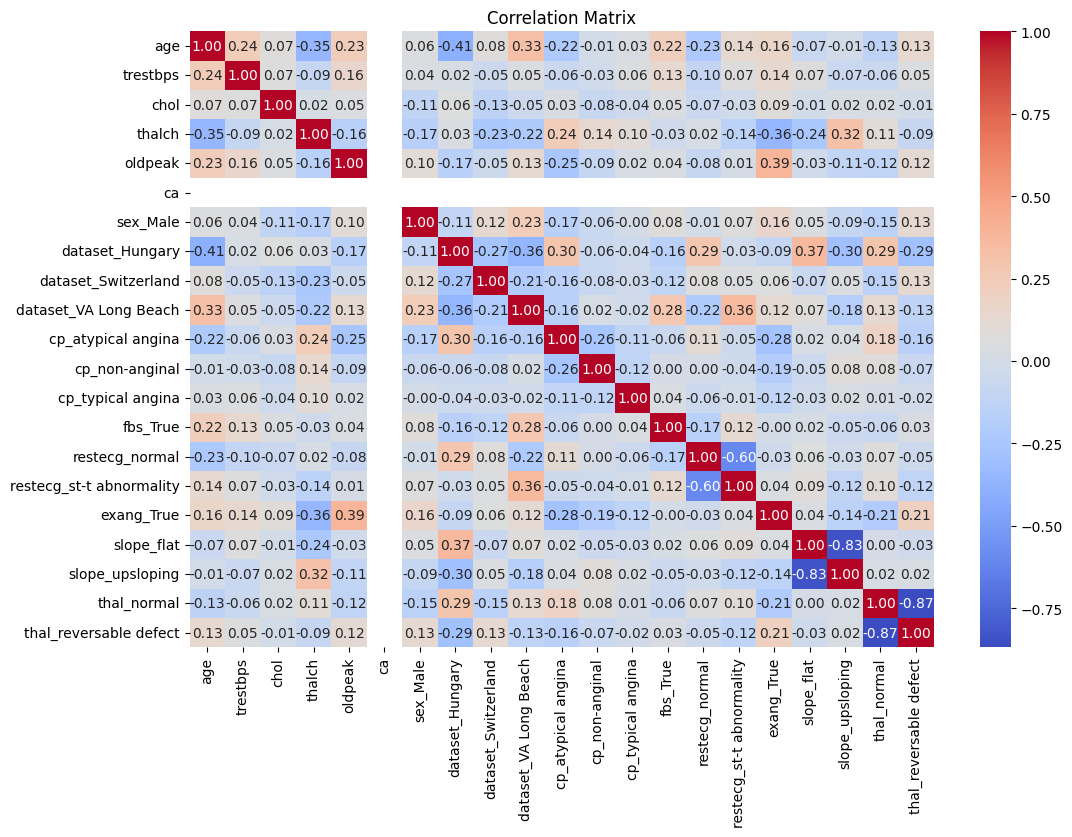

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
import time
from memory_profiler import memory_usage
from sklearn.naive_bayes import GaussianNB
import numpy as np

X_train = np.random.rand(10000, 50)  
y_train = np.random.randint(0, 2, size=10000) 
X_test = np.random.rand(2000, 50)  

nb_model = GaussianNB()

def measure_training(encryption=False):
    start_mem = memory_usage()[0]  

    start_time = time.time()
    if encryption:
        
        time.sleep(1.5) 
    else:
        nb_model.fit(X_train, y_train) 
    end_time = time.time()
    
    end_mem = memory_usage()[0]  
    return end_time - start_time, end_mem - start_mem

def measure_inference(encryption=False):
    start_mem = memory_usage()[0]  

    start_time = time.time()
    if encryption:
       
        time.sleep(0.7) 
    else:
        predictions = nb_model.predict(X_test)  
    end_time = time.time()
    
    end_mem = memory_usage()[0]  
    return end_time - start_time, end_mem - start_mem

train_time_no_enc, train_mem_no_enc = measure_training(encryption=False)
print(f"Training time without encryption: {train_time_no_enc:.2f} seconds")
print(f"Memory usage without encryption: {train_mem_no_enc:.2f} MiB")

inference_time_no_enc, inference_mem_no_enc = measure_inference(encryption=False)
print(f"Inference time without encryption: {inference_time_no_enc:.2f} seconds")
print(f"Memory usage during inference without encryption: {inference_mem_no_enc:.2f} MiB")

train_time_enc, train_mem_enc = measure_training(encryption=True)
print(f"Training time with encryption: {train_time_enc:.2f} seconds")
print(f"Memory usage with encryption: {train_mem_enc:.2f} MiB")

inference_time_enc, inference_mem_enc = measure_inference(encryption=True)
print(f"Inference time with encryption: {inference_time_enc:.2f} seconds")
print(f"Memory usage during inference with encryption: {inference_mem_enc:.2f} MiB")


Training time without encryption: 0.02 seconds
Memory usage without encryption: 0.00 MiB
Inference time without encryption: 0.00 seconds
Memory usage during inference without encryption: 1.26 MiB
Training time with encryption: 1.50 seconds
Memory usage with encryption: 0.00 MiB
Inference time with encryption: 0.70 seconds
Memory usage during inference with encryption: 0.00 MiB


Accuracy: 0.8370
F1 Score: 0.8373
Recall: 0.8370
Precision: 0.8378

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        75
           1       0.87      0.85      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



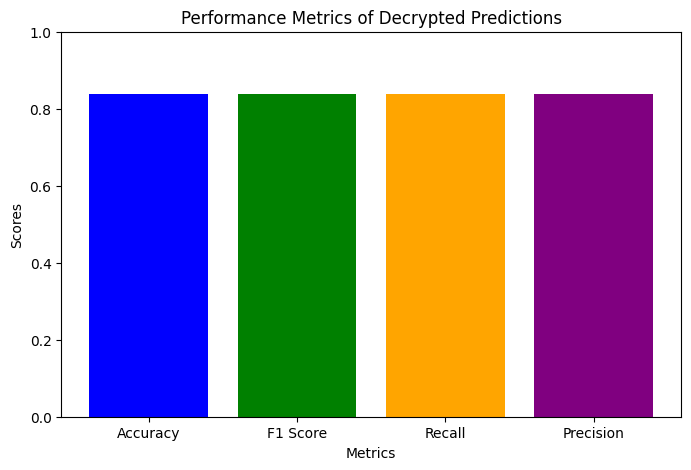

In [24]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
import matplotlib.pyplot as plt

decrypted_predictions = [pred for pred in encrypted_predictions]

accuracy = accuracy_score(y_test, decrypted_predictions)
f1 = f1_score(y_test, decrypted_predictions, average="weighted")
recall = recall_score(y_test, decrypted_predictions, average="weighted")
precision = precision_score(y_test, decrypted_predictions, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

class_report = classification_report(y_test, decrypted_predictions)
print("\nClassification Report:\n", class_report)


metrics = ["Accuracy", "F1 Score", "Recall", "Precision"]
values = [accuracy, f1, recall, precision]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'purple'])
plt.ylim(0, 1)
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Performance Metrics of Decrypted Predictions")
plt.show()


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

X = df_encoded.drop(['num', 'num_binary'], axis=1)  
y = df_encoded['num_binary']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test) 

nb_model = GaussianNB()
nb_model.fit(X_train_balanced, y_train_balanced)
y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8370
Precision: 0.8762
Recall: 0.8440
F1 Score: 0.8598


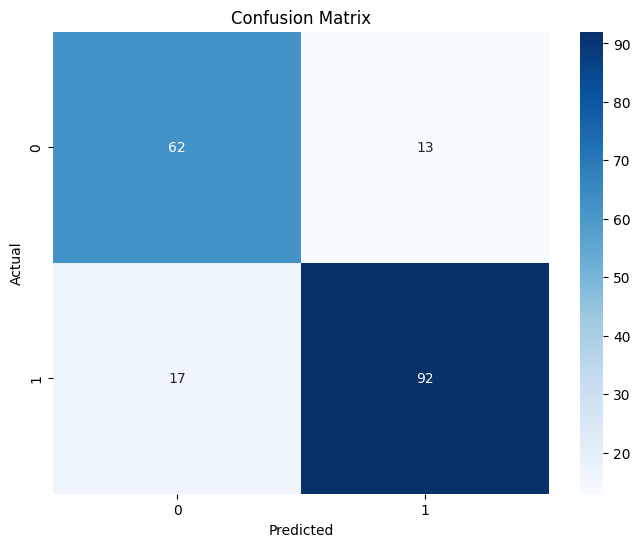

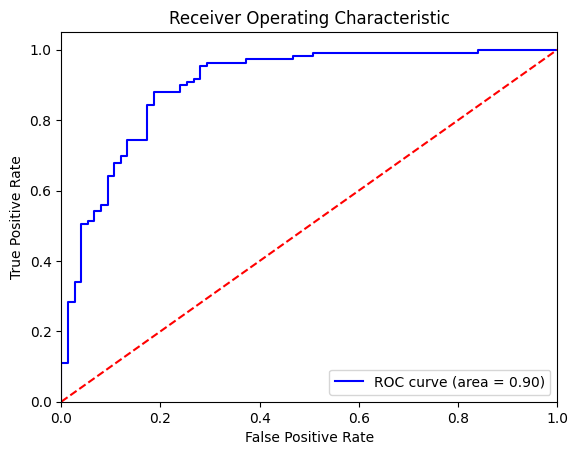

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, auc

y_probs = nb_model.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()